In [417]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [418]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [419]:
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

 

In [420]:
##Reading and understanding file 


In [421]:
inp = pd.read_csv("day.csv")
df= inp

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [422]:
df.shape

(730, 16)

In [423]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [424]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [425]:
##Visualizing the data


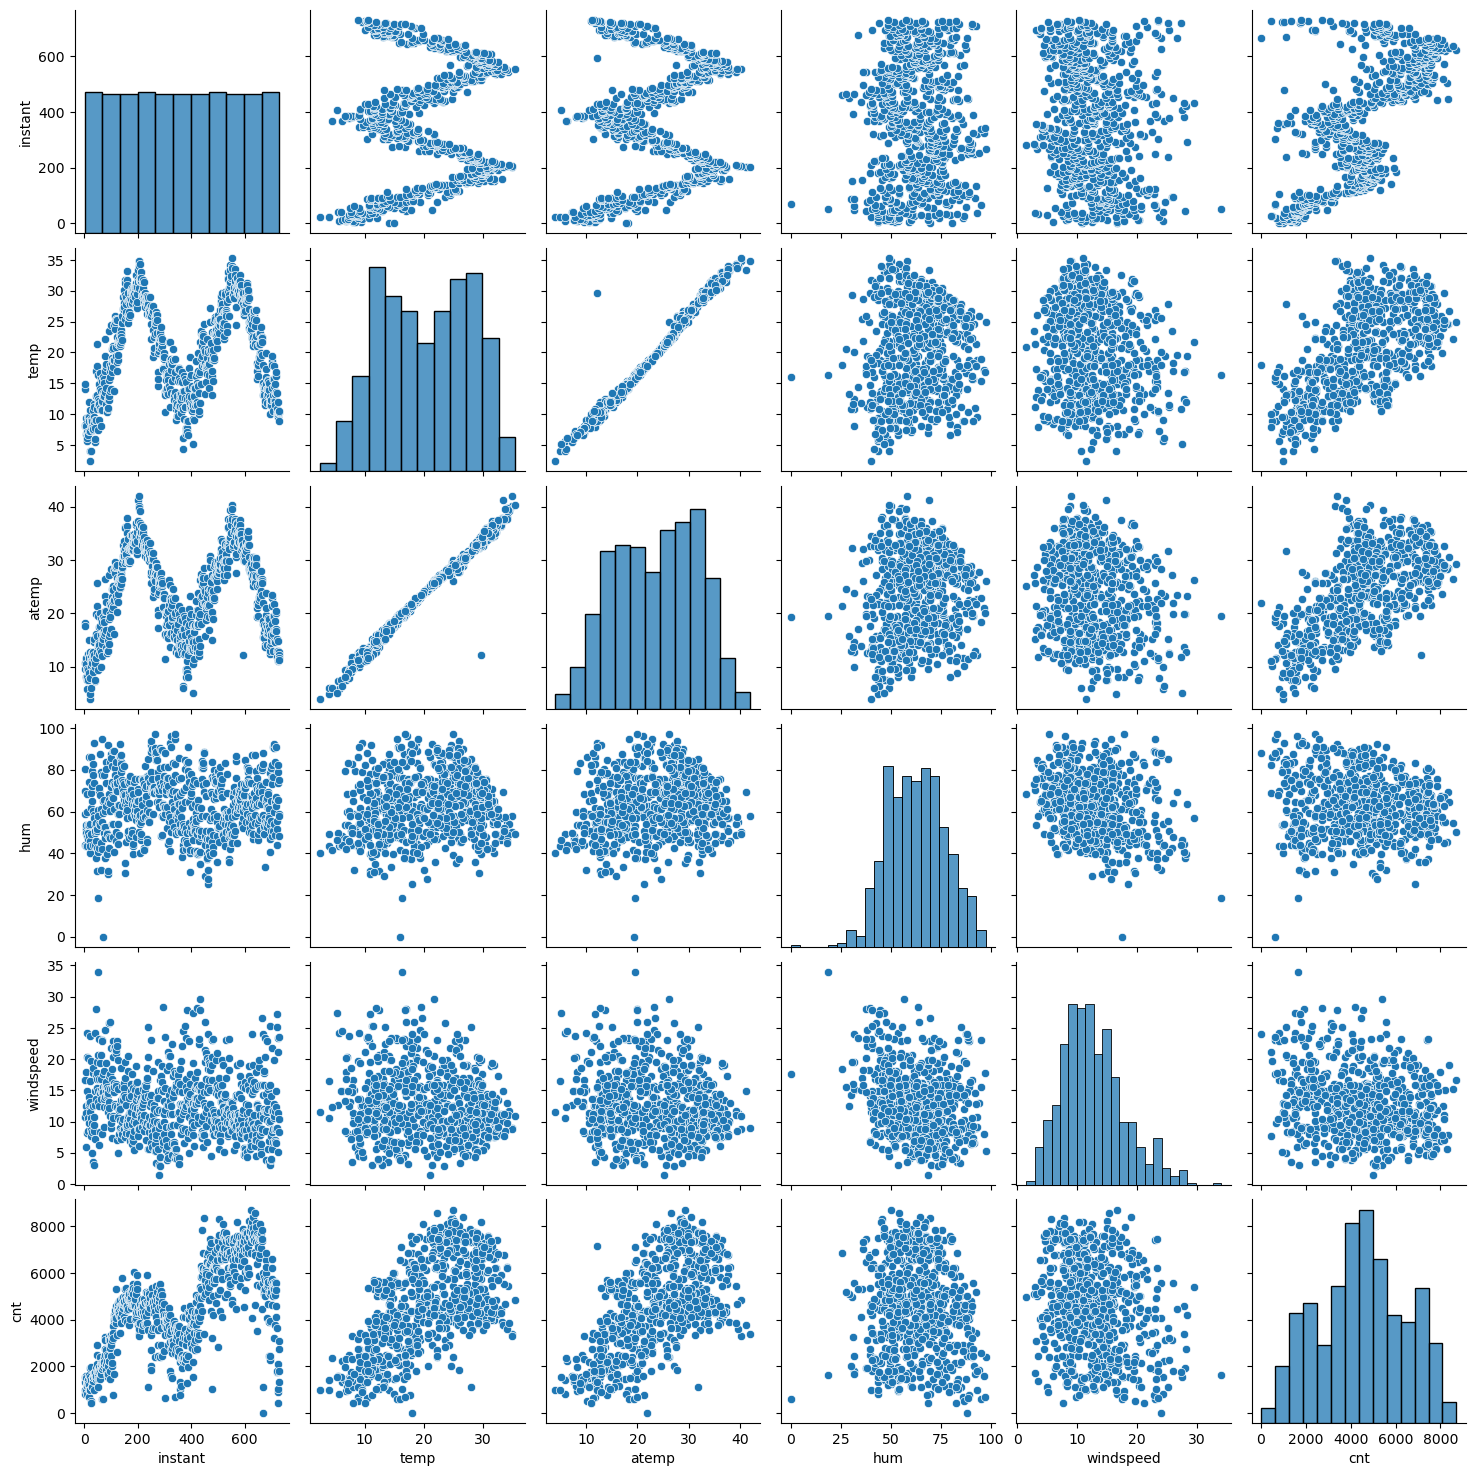

In [426]:
sns.pairplot(df[['instant','temp','atemp','hum','windspeed','cnt']])
plt.show()

In [427]:
#drop similar or unwanted values
df.drop(['instant','dteday','casual','registered', 'temp'], inplace=True, axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600


In [428]:
df.shape


(730, 11)

In [429]:
## Data Preparation

In [430]:
df['season'] = df['season'].map({1: "spring", 2: "summer", 3: "fall", 4: "winter"})
df.season.value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [431]:
df['mnth'] = df['mnth'].map({ 1: "jan",  2: "feb",   3: "mar", 4: "apr",
                 5: "may",  6: "jun",   7: "jul", 8: "aug",
                 9: "sep", 10: "oct",  11: "nov", 12: "dec"})
df.mnth.value_counts()

mnth
jan    62
mar    62
may    62
jul    62
aug    62
oct    62
dec    62
apr    60
jun    60
sep    60
nov    60
feb    56
Name: count, dtype: int64

In [432]:
df['weekday'] = df['weekday'].map({0: "sun",   1: "mon",   2: "tue",   3: "wed",
                                   4: "thu",5: "fri",   6: "sat"})
df.weekday.value_counts()

weekday
sat    105
sun    105
mon    105
tue    104
thu    104
fri    104
wed    103
Name: count, dtype: int64

In [433]:
df['weathersit'] = df['weathersit'].map({1: "clear",2: "mistcloudy", 3:"lightsnow",4: "heavyrain"})
df.weathersit.value_counts()

weathersit
clear         463
mistcloudy    246
lightsnow      21
Name: count, dtype: int64

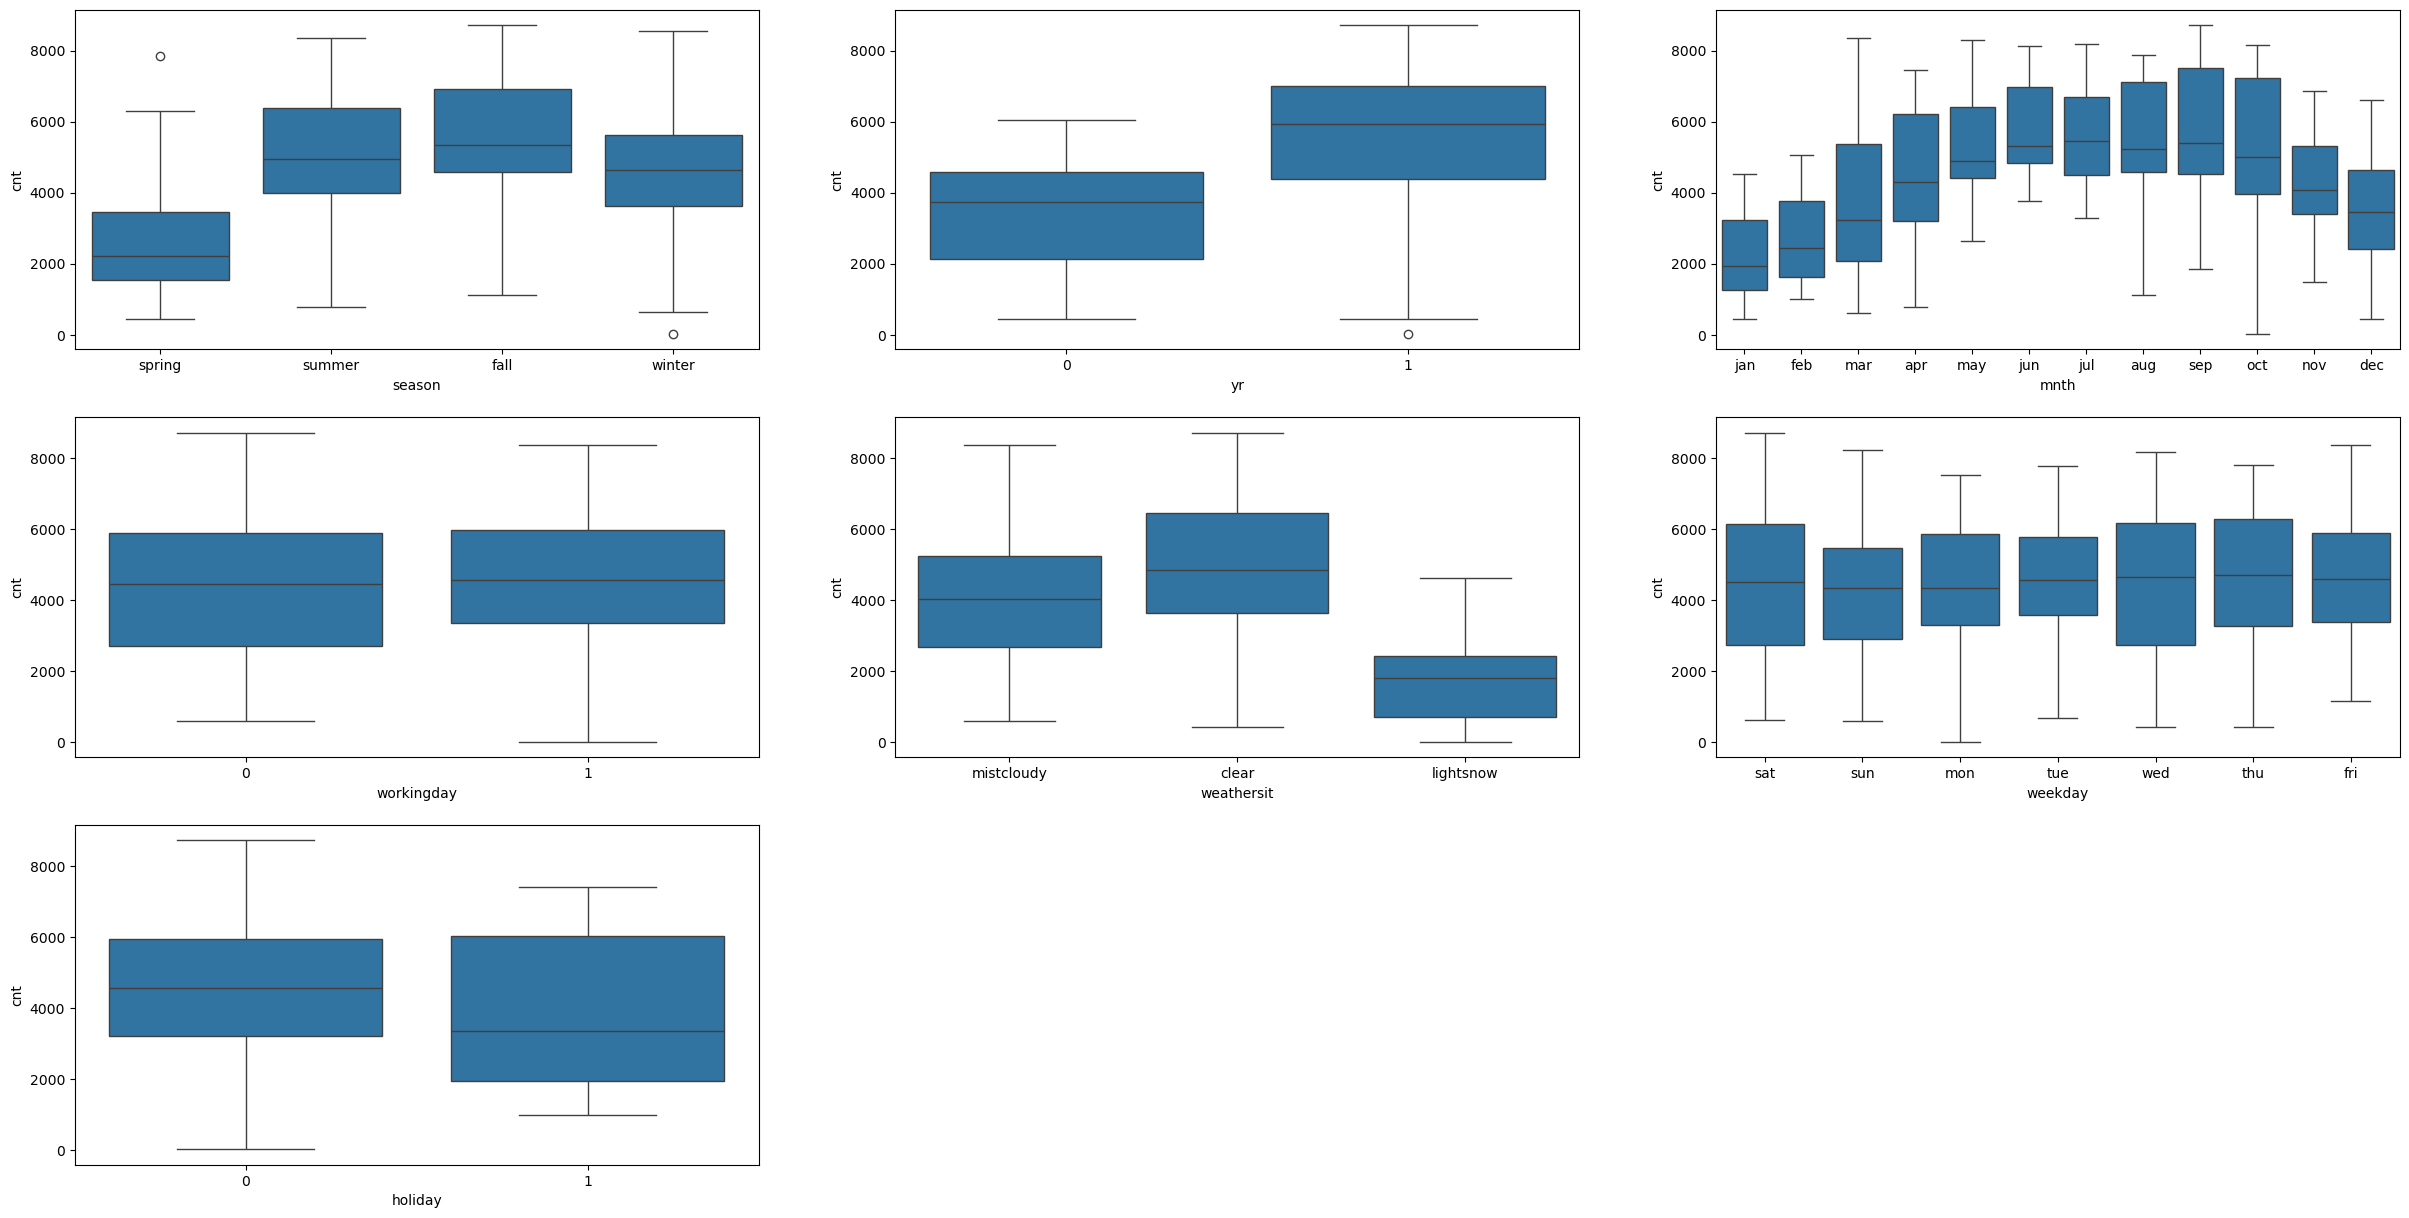

In [434]:
#Visualising categorical Variables to understand data better
plt.figure(figsize=(30, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)#yr','mnth','workingday','weathersit','weekday'
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.show()

In [435]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [436]:
#CREATING DUMMY VARIABLES FOR CATEGORICAL DATA 

season_dum=pd.get_dummies(df.season,drop_first=True,dtype=int)
season_dum.head()


,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [437]:
#CREATING DUMMY VARIABLES FOR CATEGORICAL DATA 

mnth_dum=pd.get_dummies(df['mnth'],drop_first=True,dtype=int)
mnth_dum.head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [438]:
#CREATING DUMMY VARIABLES FOR CATEGORICAL DATA 

weathersit_dum=pd.get_dummies(df['weathersit'],drop_first=True, dtype=int)
weathersit_dum.head()

,lightsnow,mistcloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [439]:
#CREATING DUMMY VARIABLES FOR CATEGORICAL DATA 

weekday_dum=pd.get_dummies(df['weekday'],drop_first=True,dtype=int)
weekday_dum.head()

,mon,sat,sun,thu,tue,wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [440]:
df= pd.concat([df,season_dum,weathersit_dum,mnth_dum,weekday_dum], axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
0,spring,0,jan,0,sat,0,mistcloudy,18.18125,80.5833,10.749882,...,0,0,0,0,0,1,0,0,0,0
1,spring,0,jan,0,sun,0,mistcloudy,17.68695,69.6087,16.652113,...,0,0,0,0,0,0,1,0,0,0
2,spring,0,jan,0,mon,1,clear,9.47025,43.7273,16.636703,...,0,0,0,0,1,0,0,0,0,0
3,spring,0,jan,0,tue,1,clear,10.60610,59.0435,10.739832,...,0,0,0,0,0,0,0,0,1,0
4,spring,0,jan,0,wed,1,clear,11.46350,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,1


In [441]:
df.shape

(730, 33)

In [442]:
#### Drop the column for which dummies are created 


In [443]:
df.drop(['season','mnth','weekday','weathersit'],axis=1, inplace=True)
df.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [444]:
df.shape

(730, 29)

In [445]:
bike_train,bike_test= train_test_split(df, train_size=0.7, test_size=0.3,random_state=50)
print(bike_train.shape)
print(bike_test.shape)

(510, 29)
(219, 29)


In [446]:
####Rescale the train dataset

In [447]:
var_list=['atemp','hum','windspeed']
scaler =MinMaxScaler()
bike_train[var_list] =scaler.fit_transform(bike_train[var_list])
bike_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.482353,0.023529,0.705882,0.545242,0.644848,0.318203,4454.445098,0.245098,0.254902,0.250980,...,0.100000,0.086275,0.086275,0.064706,0.152941,0.135294,0.135294,0.145098,0.149020,0.139216
std,0.500179,0.151726,0.456092,0.223322,0.149640,0.167086,1941.858196,0.430568,0.436234,0.434003,...,0.300295,0.281045,0.281045,0.246248,0.360284,0.342373,0.342373,0.352545,0.356457,0.346511
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.345522,0.524581,0.197916,3068.750000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.556759,0.648347,0.295422,4509.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.732269,0.752576,0.406471,5864.250000,0.000000,1.000000,0.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [448]:
##visualize the data


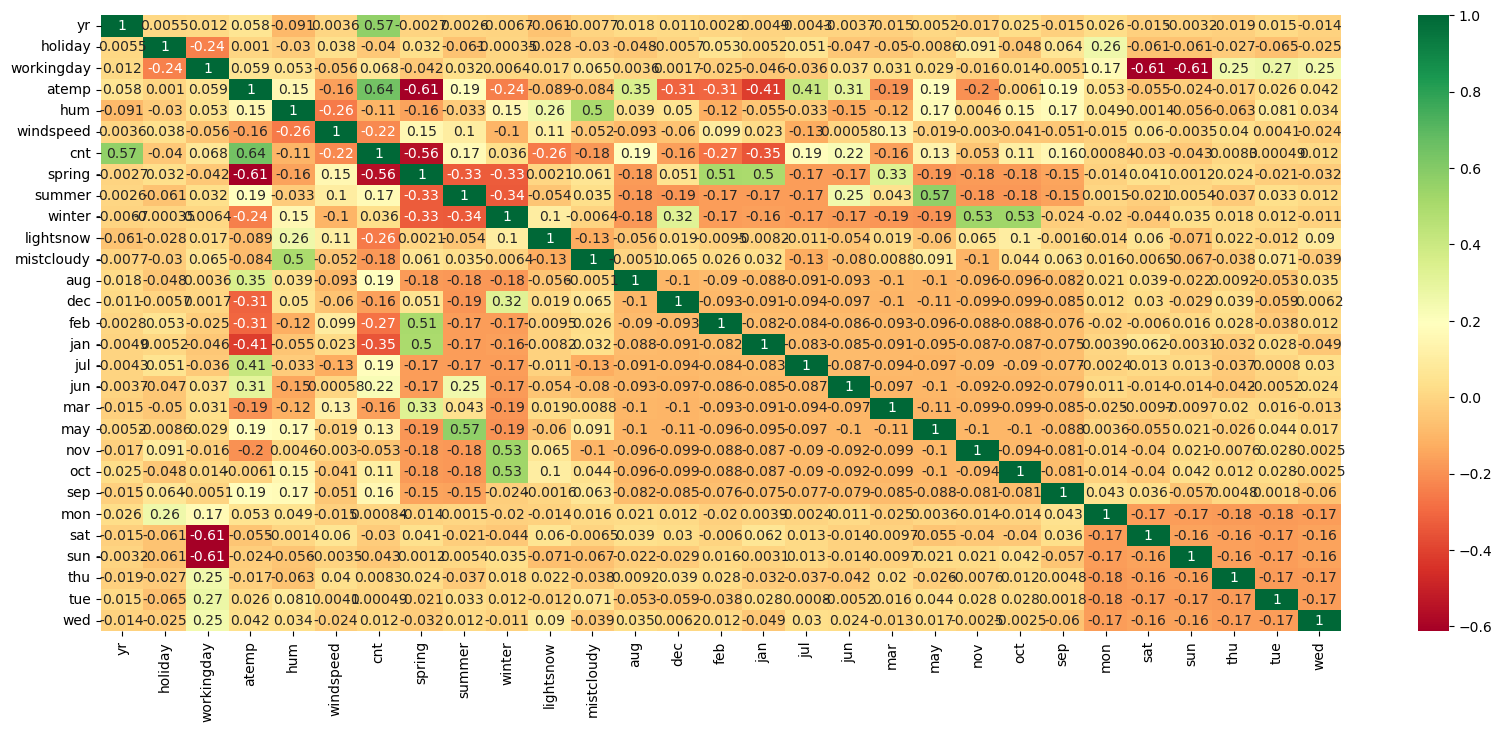

In [449]:
plt.figure(figsize=(20,8))
sns.heatmap(bike_train.corr(),cmap='RdYlGn', annot= True)
plt.show()

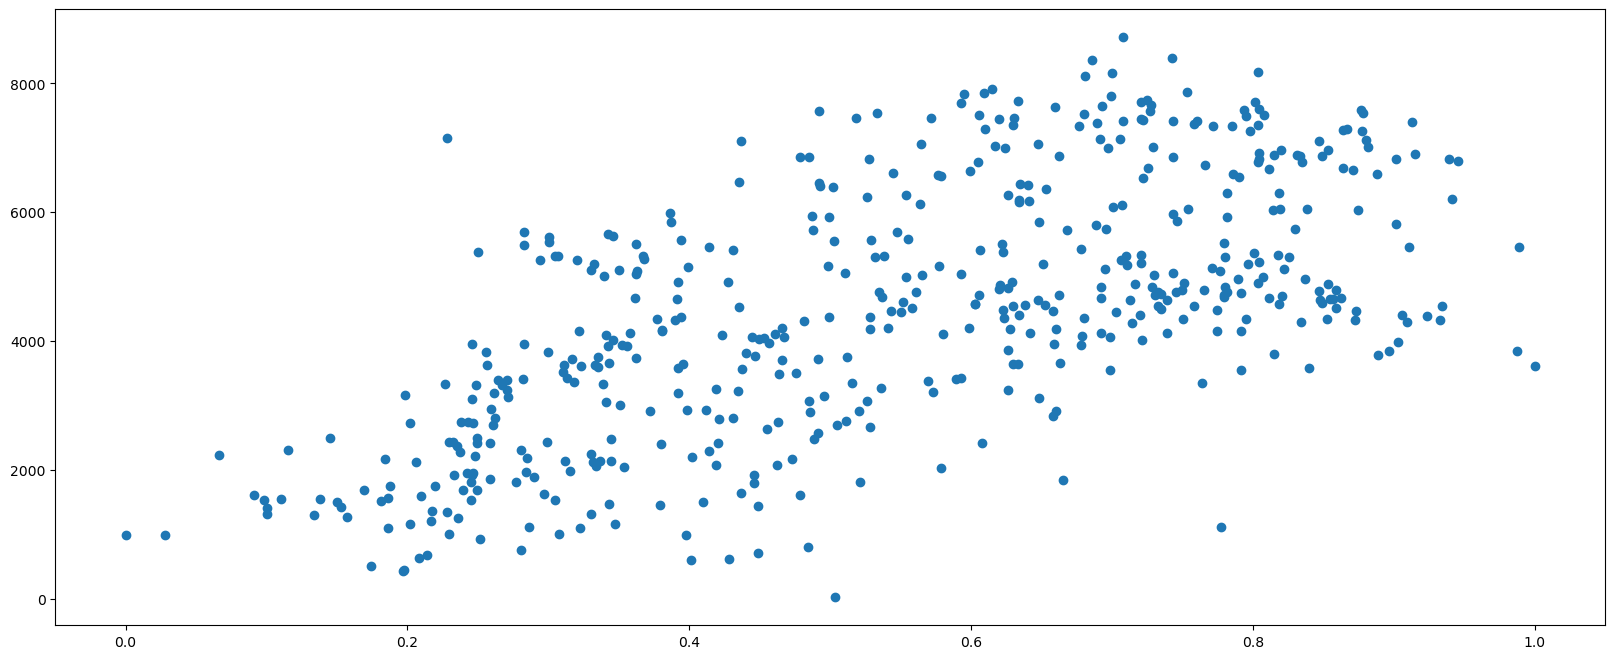

In [450]:
plt.figure(figsize=(20,8))
plt.scatter(bike_train.atemp,bike_train.cnt)
plt.show()

In [451]:
###Divide Xand Y sets for model building 

In [452]:
y_train=bike_train.pop('cnt')
y_train.head()

707    3228
172    4507
14     1248
204    3606
182    5119
Name: cnt, dtype: int64

In [453]:
X_train=bike_train
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,lightsnow,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
707,1,0,0,0.434610,0.933018,0.243629,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
172,0,0,1,0.858891,0.729068,0.274549,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
14,0,0,0,0.236172,0.513954,0.243603,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
204,0,0,0,1.000000,0.567625,0.267859,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
182,0,0,0,0.821838,0.458136,0.150755,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [454]:
###Model selection on the bais of RFE

In [455]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'lightsnow', 'mistcloudy', 'aug', 'dec', 'feb',
       'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'mon', 'sat',
       'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [456]:

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(estimator=lm, n_features_to_select=15)         
rfe.fit(X_train, y_train)
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False, False,  True, False,  True, False, False, False,
       False,  True, False,  True, False,  True,  True, False, False,
       False])

In [457]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 8),
 ('winter', True, 1),
 ('lightsnow', True, 1),
 ('mistcloudy', False, 2),
 ('aug', False, 7),
 ('dec', True, 1),
 ('feb', False, 5),
 ('jan', True, 1),
 ('jul', False, 12),
 ('jun', False, 4),
 ('mar', False, 13),
 ('may', False, 3),
 ('nov', True, 1),
 ('oct', False, 10),
 ('sep', True, 1),
 ('mon', False, 6),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 14),
 ('tue', False, 9),
 ('wed', False, 11)]

In [458]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'spring',
       'winter', 'lightsnow', 'dec', 'jan', 'nov', 'sep', 'sat', 'sun'],
      dtype='object')

In [459]:
X_train_rfe= X_train[col]
X_train_rfe.head()

,yr,holiday,workingday,atemp,hum,windspeed,spring,winter,lightsnow,dec,jan,nov,sep,sat,sun
707,1,0,0,0.434610,0.933018,0.243629,0,1,0,1,0,0,0,0,1
172,0,0,1,0.858891,0.729068,0.274549,0,0,0,0,0,0,0,0,0
14,0,0,0,0.236172,0.513954,0.243603,1,0,0,0,1,0,0,1,0
204,0,0,0,1.000000,0.567625,0.267859,0,0,0,0,0,0,0,0,1
182,0,0,0,0.821838,0.458136,0.150755,0,0,0,0,0,0,0,1,0


In [460]:
##Building the model using statsmodel 

In [461]:
X_train_sm= sm.add_constant(X_train_rfe)
lm= sm.OLS(y_train,X_train_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.3
Date:                Sun, 09 Mar 2025   Prob (F-statistic):          1.96e-187
Time:                        19:25:40   Log-Likelihood:                -4115.3
No. Observations:                 510   AIC:                             8261.
Df Residuals:                     495   BIC:                             8324.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2887.0969    221.479     13.036      0.000    2451.941    3322.253
yr          2012.8255     70.295     28.634      0.000    1874.711    2150.940
holiday      385.7432    196.118      1.967      0.050       0.417     771.069
workingday   889.3973     81.761     10.878      0.000     728.755    1050.039
atemp       3833.1023    273.392     14.021      0.000    3295.951    4370.253
hum        -2554.6064    262.887     -9.718      0.000   -3071.118   -2038.095
windspeed  -1573.7798    223.992     -7.026      0.000   -2013.872   -1133.688
spring     -1000.3632    134.902     -7.415      0.000   -1265.415    -735.312
winter       731.5335    123.592      5.919      0.000     488.704     974.363
lightsnow  -1515.2650    213.014     -7.113      0.000   -1933.788   -1096.742
dec         -522.3104    145.656     -3.586      0.000    -808.491    -236.130
jan         -374.1714    160.905     -2.325      0.020    -690.313     -58.030
nov         -519.7278    162.062     -3.207      0.001    -838.141    -201.314
sep          473.3586    147.110      3.218      0.001     184.322     762.395
sat         1025.6392    104.412      9.823      0.000     820.493    1230.785
sun          586.3172    103.447      5.668      0.000     383.068     789.567
==============================================================================
Omnibus:                       81.219   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.346
Skew:                          -0.759   Prob(JB):                     4.77e-52
Kurtosis:                       5.970   Cond. No.                     2.71e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.94e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [462]:
def vif(X_train_new):
    vif = pd.DataFrame()
    vif["Features"] = X_train_new.columns
    vif["VIF"] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]


def calculate_vif(X):
    vif = pd.DataFrame()
    vif["Features"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

# Example usage:
  # Replace with your feature matrix
print(calculate_vif(X))




      Features        VIF
0           yr   1.022039
1      holiday   2.534004
2   workingday  42.794405
3        atemp   3.081728
4          hum   1.279371
5    windspeed   1.157996
6       spring   2.789223
7       winter   2.378628
8          dec   1.498356
9          jan   1.478908
10         nov   1.715037
11         sep   1.084901
12   lightsnow   1.142189
13         sat   8.907375
14         sun   8.785264


In [463]:
#COLUMN workingday HAS A VERY HIGH VIF SO WE DROP IT 
X_train_rfe1=X_train_rfe.drop(['workingday'],axis=1)

In [464]:
X_train_rfe1.columns

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'spring', 'winter',
       'lightsnow', 'dec', 'jan', 'nov', 'sep', 'sat', 'sun'],
      dtype='object')

In [465]:
X_train_sm =sm.add_constant(X_train_rfe1)
lm= sm.OLS(y_train,X_train_sm).fit()
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.3
Date:                Sun, 09 Mar 2025   Prob (F-statistic):          1.96e-187
Time:                        19:26:46   Log-Likelihood:                -4115.3
No. Observations:                 510   AIC:                             8261.
Df Residuals:                     495   BIC:                             8324.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3776.4942    270.533     13.959      0.000    3244.960    4308.028
yr          2012.8255     70.295     28.634      0.000    1874.711    2150.940
holiday     -503.6541    233.375     -2.158      0.031    -962.181     -45.127
atemp       3833.1023    273.392     14.021      0.000    3295.951    4370.253
hum        -2554.6064    262.887     -9.718      0.000   -3071.118   -2038.095
windspeed  -1573.7798    223.992     -7.026      0.000   -2013.872   -1133.688
spring     -1000.3632    134.902     -7.415      0.000   -1265.415    -735.312
winter       731.5335    123.592      5.919      0.000     488.704     974.363
lightsnow  -1515.2650    213.014     -7.113      0.000   -1933.788   -1096.742
dec         -522.3104    145.656     -3.586      0.000    -808.491    -236.130
jan         -374.1714    160.905     -2.325      0.020    -690.313     -58.030
nov         -519.7278    162.062     -3.207      0.001    -838.141    -201.314
sep          473.3586    147.110      3.218      0.001     184.322     762.395
sat          136.2419    103.968      1.310      0.191     -68.032     340.516
sun         -303.0801    103.763     -2.921      0.004    -506.951     -99.209
==============================================================================
Omnibus:                       81.219   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.346
Skew:                          -0.759   Prob(JB):                     4.77e-52
Kurtosis:                       5.970   Cond. No.                         16.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [466]:
#COLUMN workingday HAS A VERY HIGH VIF SO WE DROP IT 
X_train_rfe2=X_train_rfe1.drop(['sat'],axis=1)



In [467]:
X_train_sm =sm.add_constant(X_train_rfe2)
lm= sm.OLS(y_train,X_train_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     201.3
Date:                Sun, 09 Mar 2025   Prob (F-statistic):          3.18e-188
Time:                        19:27:19   Log-Likelihood:                -4116.2
No. Observations:                 510   AIC:                             8260.
Df Residuals:                     496   BIC:                             8320.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3804.9651    269.854     14.100      0.000    3274.767    4335.163
yr          2012.0047     70.343     28.603      0.000    1873.797    2150.213
holiday     -525.8251    232.929     -2.257      0.024    -983.474     -68.177
atemp       3817.9222    273.343     13.967      0.000    3280.868    4354.976
hum        -2556.2675    263.074     -9.717      0.000   -3073.144   -2039.392
windspeed  -1560.0313    223.908     -6.967      0.000   -1999.956   -1120.107
spring     -1006.4602    134.919     -7.460      0.000   -1271.544    -741.376
winter       723.7154    123.537      5.858      0.000     480.995     966.435
lightsnow  -1503.4593    212.977     -7.059      0.000   -1921.908   -1085.010
dec         -516.0740    145.684     -3.542      0.000    -802.307    -229.841
jan         -364.6604    160.858     -2.267      0.024    -680.707     -48.614
nov         -520.7784    162.177     -3.211      0.001    -839.417    -202.140
sep          481.9173    147.071      3.277      0.001     192.958     770.876
sun         -323.9234    102.611     -3.157      0.002    -525.530    -122.317
==============================================================================
Omnibus:                       79.189   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.230
Skew:                          -0.729   Prob(JB):                     1.86e-52
Kurtosis:                       6.014   Cond. No.                         16.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [371]:
X_train_sm =sm.add_constant(X_train_rfe)
lm= sm.OLS(y_train,X_train_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     201.3
Date:                Sun, 09 Mar 2025   Prob (F-statistic):          3.18e-188
Time:                        19:15:39   Log-Likelihood:                -4116.2
No. Observations:                 510   AIC:                             8260.
Df Residuals:                     496   BIC:                             8320.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3804.9651    269.854     14.100      0.000    3274.767    4335.163
yr          2012.0047     70.343     28.603      0.000    1873.797    2150.213
holiday     -525.8251    232.929     -2.257      0.024    -983.474     -68.177
atemp       3817.9222    273.343     13.967      0.000    3280.868    4354.976
hum        -2556.2675    263.074     -9.717      0.000   -3073.144   -2039.392
windspeed  -1560.0313    223.908     -6.967      0.000   -1999.956   -1120.107
spring     -1006.4602    134.919     -7.460      0.000   -1271.544    -741.376
winter       723.7154    123.537      5.858      0.000     480.995     966.435
dec         -516.0740    145.684     -3.542      0.000    -802.307    -229.841
jan         -364.6604    160.858     -2.267      0.024    -680.707     -48.614
nov         -520.7784    162.177     -3.211      0.001    -839.417    -202.140
sep          481.9173    147.071      3.277      0.001     192.958     770.876
lightsnow  -1503.4593    212.977     -7.059      0.000   -1921.908   -1085.010
sun         -323.9234    102.611     -3.157      0.002    -525.530    -122.317
==============================================================================
Omnibus:                       79.189   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.230
Skew:                          -0.729   Prob(JB):                     1.86e-52
Kurtosis:                       6.014   Cond. No.                         16.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [468]:
print(calculate_vif(X_train_rfe2))

     Features        VIF
0          yr   1.948961
1     holiday   1.055310
2       atemp  12.712659
3         hum  16.560868
4   windspeed   4.013193
5      spring   2.777454
6      winter   2.938977
7   lightsnow   1.151396
8         dec   1.580358
9         jan   1.543429
10        nov   1.815594
11        sep   1.153721
12        sun   1.169149


In [469]:
lm.params

const        3804.965068
yr           2012.004691
holiday      -525.825057
atemp        3817.922163
hum         -2556.267535
windspeed   -1560.031283
spring      -1006.460167
winter        723.715426
lightsnow   -1503.459260
dec          -516.074045
jan          -364.660421
nov          -520.778441
sep           481.917290
sun          -323.923408
dtype: float64

In [470]:
X_train_rfe2

,yr,holiday,atemp,hum,windspeed,spring,winter,lightsnow,dec,jan,nov,sep,sun
707,1,0,0.434610,0.933018,0.243629,0,1,0,1,0,0,0,1
172,0,0,0.858891,0.729068,0.274549,0,0,0,0,0,0,0,0
14,0,0,0.236172,0.513954,0.243603,1,0,0,0,1,0,0,0
204,0,0,1.000000,0.567625,0.267859,0,0,0,0,0,0,0,1
182,0,0,0.821838,0.458136,0.150755,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0,0,0.344642,0.612709,0.379542,1,0,0,0,0,0,0,0
132,0,0,0.580126,0.889652,0.290701,0,0,0,0,0,0,0,0
289,0,0,0.603073,0.597251,0.281295,0,1,0,0,0,0,0,0
109,0,0,0.678052,0.632890,0.425316,0,0,0,0,0,0,0,0


In [471]:
###residul Analysis

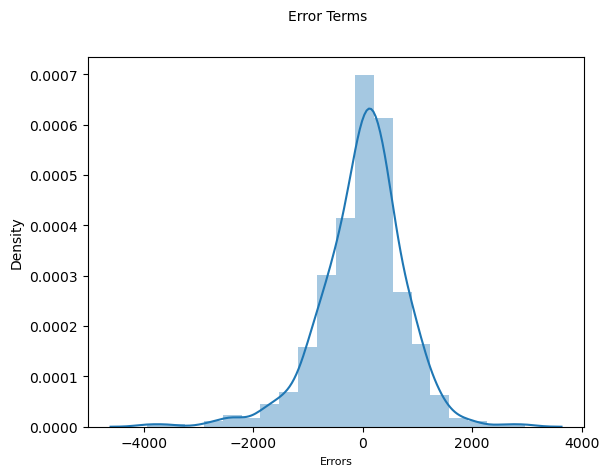

In [472]:
res= y_train-y_train_pred
fig=plt.figure()
sns.distplot(res,bins=20)
fig.suptitle('Error Terms', fontsize=10)
plt.xlabel('Errors', fontsize=8)
plt.show()

In [473]:
##Homoscedasticity 

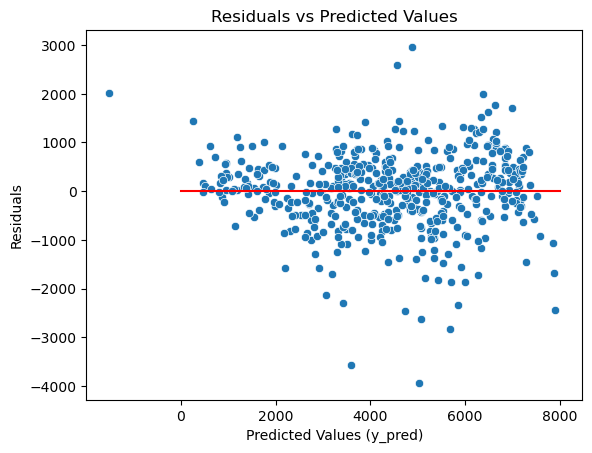

In [480]:
# Correct scatterplot syntax
sns.scatterplot(x=y_train_pred, y=res)
plt.xlabel('Predicted Values (y_pred)')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
sns.lineplot(x=[0, 8000], y=[0, 0], color='red')
plt.show()

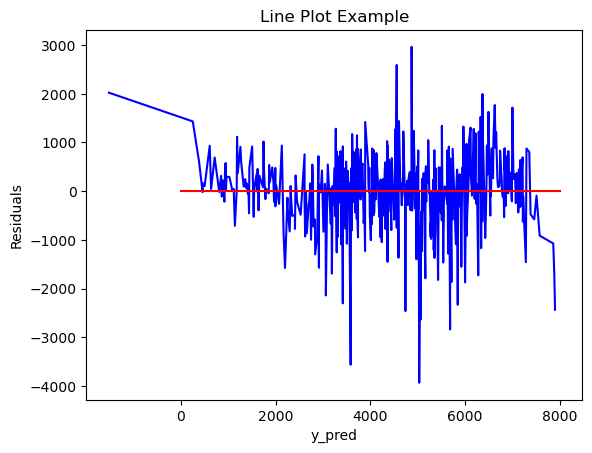

In [481]:
sns.lineplot(x=y_train_pred, y=res, markers='0', color='blue')
plt.xlabel('y_pred')
plt.ylabel('Residuals')
plt.title('Line Plot Example')
sns.lineplot(x=[0, 8000], y=[0, 0], color='red')
plt.show()



In [482]:
## Aplly the model on the test data set 


In [483]:
bike_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.538813,0.041096,0.630137,24.352629,63.176904,12.495316,4627.598174,0.251142,0.246575,0.223744,...,0.050228,0.068493,0.082192,0.123288,0.123288,0.164384,0.164384,0.136986,0.123288,0.146119
std,0.499633,0.198967,0.483873,8.505412,13.605548,5.239795,1924.239131,0.434663,0.432005,0.417707,...,0.218916,0.253169,0.275286,0.329520,0.329520,0.371472,0.371472,0.344621,0.329520,0.354034
min,0.000000,0.000000,0.000000,5.082900,30.217400,1.500244,801.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,17.729100,53.520800,8.750468,3362.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,25.599150,62.217400,11.958361,4590.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,31.219275,72.625000,15.639274,6168.000000,0.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,42.044800,97.250000,27.833743,8555.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [484]:
X_test= bike_test.copy(deep=True)
X_test.shape

(219, 29)

In [485]:
bike_test.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'lightsnow', 'mistcloudy', 'aug', 'dec',
       'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'mon',
       'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [486]:
X_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.538813,0.041096,0.630137,24.352629,63.176904,12.495316,4627.598174,0.251142,0.246575,0.223744,...,0.050228,0.068493,0.082192,0.123288,0.123288,0.164384,0.164384,0.136986,0.123288,0.146119
std,0.499633,0.198967,0.483873,8.505412,13.605548,5.239795,1924.239131,0.434663,0.432005,0.417707,...,0.218916,0.253169,0.275286,0.329520,0.329520,0.371472,0.371472,0.344621,0.329520,0.354034
min,0.000000,0.000000,0.000000,5.082900,30.217400,1.500244,801.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,17.729100,53.520800,8.750468,3362.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,25.599150,62.217400,11.958361,4590.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,31.219275,72.625000,15.639274,6168.000000,0.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,42.044800,97.250000,27.833743,8555.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [487]:
##Apply scaling around test 

In [488]:
X_test[var_list]=scaler.transform(bike_test[var_list])
X_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.538813,0.041096,0.630137,0.570000,0.651028,0.305357,4627.598174,0.251142,0.246575,0.223744,...,0.050228,0.068493,0.082192,0.123288,0.123288,0.164384,0.164384,0.136986,0.123288,0.146119
std,0.499633,0.198967,0.483873,0.237661,0.140203,0.169255,1924.239131,0.434663,0.432005,0.417707,...,0.218916,0.253169,0.275286,0.329520,0.329520,0.371472,0.371472,0.344621,0.329520,0.354034
min,0.000000,0.000000,0.000000,0.031559,0.311386,-0.049804,801.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.384923,0.551524,0.184392,3362.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.604831,0.641141,0.288013,4590.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.761870,0.748390,0.406913,6168.000000,0.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.064361,1.002146,0.800818,8555.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [489]:
##Diving into X and Y

In [490]:
y_test= X_test.pop('cnt')
y_test

333    3613
203    3285
279    4985
483    6304
267    5010
       ... 
168    5119
574    6597
535    6211
290    4748
43     1589
Name: cnt, Length: 219, dtype: int64

In [492]:
train_col_lst = X_train_rfe2.columns.to_list()
train_col_lst

['yr',
 'holiday',
 'atemp',
 'hum',
 'windspeed',
 'spring',
 'winter',
 'lightsnow',
 'dec',
 'jan',
 'nov',
 'sep',
 'sun']

In [493]:
X_test=X_test[train_col_lst]
X_test.head()

,yr,holiday,atemp,hum,windspeed,spring,winter,lightsnow,dec,jan,nov,sep,sun
333,0,0,0.324343,0.632030,0.488582,0,1,0,0,0,1,0,0
203,0,0,1.013214,0.515242,0.185727,0,0,0,0,0,0,0,0
279,0,0,0.594242,0.705024,-0.049804,0,1,0,0,0,0,0,0
483,1,0,0.518402,0.604980,0.154750,0,0,0,0,0,0,0,1
267,0,0,0.689572,0.870760,0.010767,0,1,0,0,0,0,1,1


In [494]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,atemp,hum,windspeed,spring,winter,lightsnow,dec,jan,nov,sep,sun
333,1.0,0,0,0.324343,0.632030,0.488582,0,1,0,0,0,1,0,0
203,1.0,0,0,1.013214,0.515242,0.185727,0,0,0,0,0,0,0,0
279,1.0,0,0,0.594242,0.705024,-0.049804,0,1,0,0,0,0,0,0
483,1.0,1,0,0.518402,0.604980,0.154750,0,0,0,0,0,0,0,1
267,1.0,0,0,0.689572,0.870760,0.010767,0,1,0,0,0,0,1,1


In [495]:
y_test_pred= lm.predict(X_test_sm)
y_test_pred.head()

333    2868.375064
203    6066.499607
279    5072.917721
483    5684.359837
267    5076.713703
dtype: float64

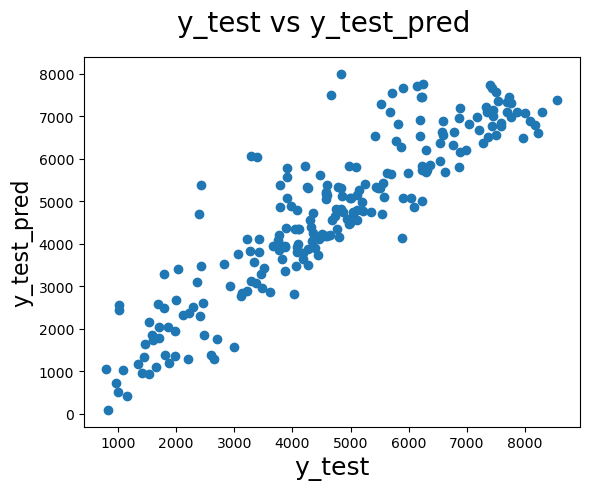

In [496]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_test_pred', fontsize = 16)
plt.show()

<Axes: ylabel='Density'>

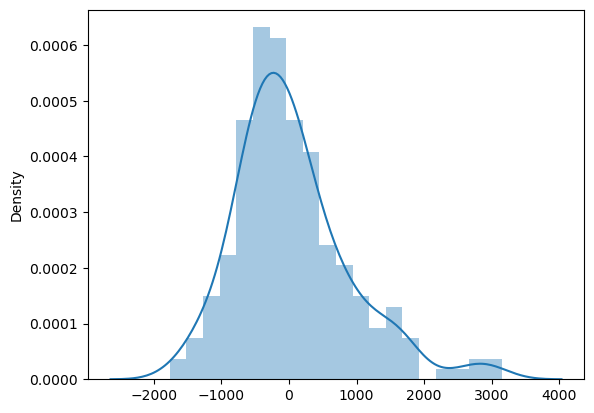

In [497]:
sns.distplot(y_test_pred-y_test,bins=20)

In [498]:
##checking the R square for the train and test data using the final model

In [499]:
print("rsquare fir the train dataset: ", r2_score(y_train,y_train_pred))

rsquare fir the train dataset:  0.8406647801965272


In [500]:
print("rsquare fir the test dataset: ", r2_score(y_test,y_test_pred))

rsquare fir the test dataset:  0.8003105664790993


In [ ]:
## Demand of bike depends on 'yr', holiday',temp','hum','windspeed',Weather, month
 